#### Assignment 

1. Create shape in external drawing apps. 
2. Write a code for identifying your shapes.
3. Write a code to sort your shapes. 

Numbers of detected contours: 10
contour: (3, 1, 2) (3, 2)
contour: (8, 1, 2) (8, 2)
contour: (4, 1, 2) (4, 2)
1.7572815533980584
contour: (4, 1, 2) (4, 2)
0.4195804195804196
contour: (4, 1, 2) (4, 2)
1.0980392156862746
contour: (9, 1, 2) (9, 2)
contour: (7, 1, 2) (7, 2)
contour: (6, 1, 2) (6, 2)
contour: (5, 1, 2) (5, 2)
contour: (16, 1, 2) (16, 2)


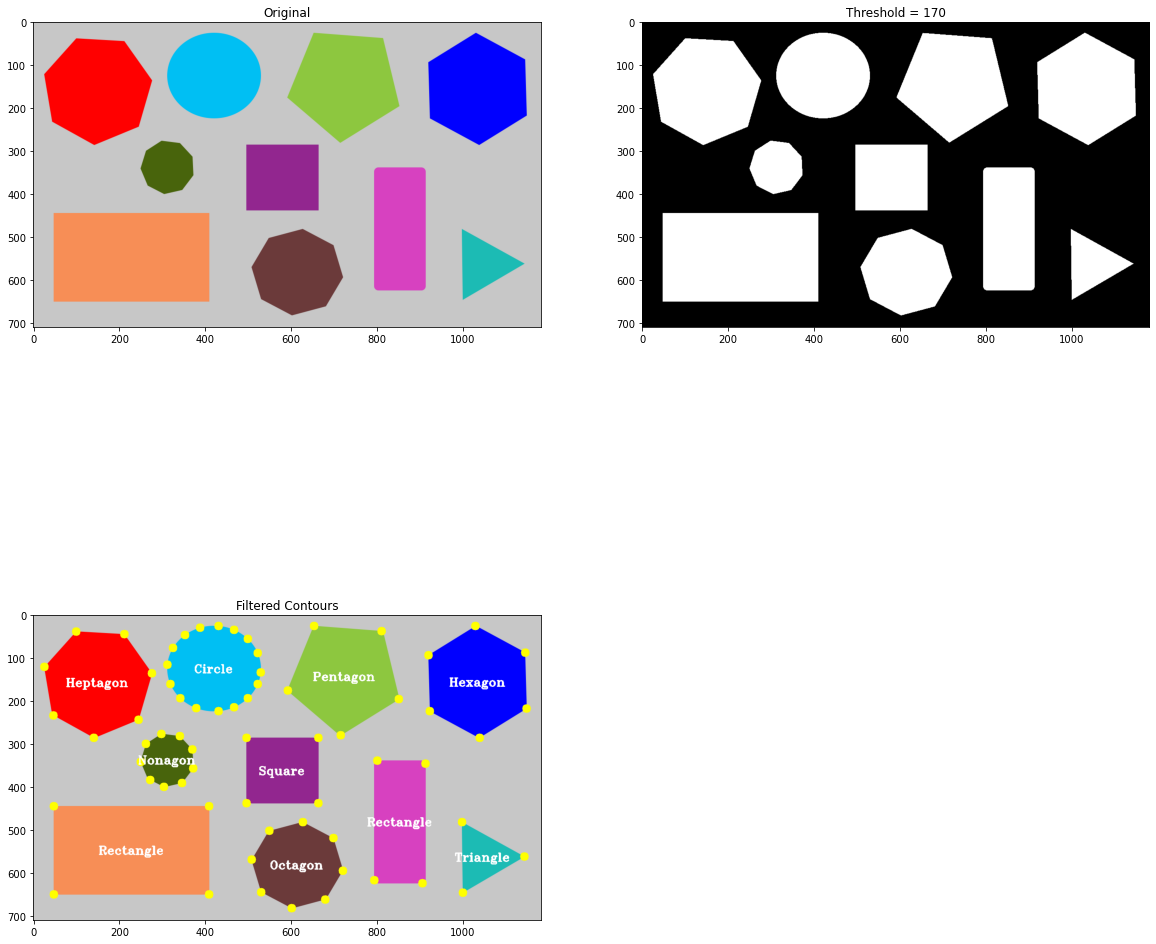

In [10]:
import cv2 as cv
import matplotlib.pyplot as plt 
import numpy as np 

# Load image
img = cv.imread("/Users/azureennaja/Desktop/Perantis/cv-master/essential/assets/shape8.png")

# Convert to grayscale 
imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply threshold to obtain binary image 
ret, imgThresh = cv.threshold(imgGray, 170, 255, cv.THRESH_BINARY_INV)

# Convert the threshold image to RGB 
imgRGB1 = cv.cvtColor(imgThresh, cv.COLOR_GRAY2RGB)

# Find contours using threshold image 
contours, hierarchy = cv.findContours(imgThresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# Print the numbers of detected contours
print(f"Numbers of detected contours: {len(contours)}")

# Apply approxPolyDP()
imgApproxPolyDP = img.copy()

#Fine perimeter
for contour in contours:
    perimeter = cv.arcLength(contour, True)
    epsilon = 0.009 * perimeter 
    approxPolyDP = cv.approxPolyDP(contour, epsilon, True)
    
    for approx in approxPolyDP:
        cv.drawContours(imgApproxPolyDP, [approx], 0, color = (0,0,255), thickness = 3)
    
    for approx in [approxPolyDP]:
        # Draw Points 
        squeeze = np.squeeze(approx)
        print('contour:',approx.shape, squeeze.shape)
        
        for p in squeeze:
            pp = tuple(p.reshape(1, -1)[0])
            cv.circle(imgApproxPolyDP, pp, 10, color = (0,255,255), thickness = -1)
            
    # determine shape   
    verticeNumber = len(approxPolyDP)
    
    if verticeNumber == 3:
        vertice_shape = (verticeNumber, 'Triangle')
    elif verticeNumber == 4:
        # get aspect ratio
        x, y, width, height = cv.boundingRect(approxPolyDP)
        aspectRatio = float(width) / height
        print(aspectRatio)
        if 0.90 < aspectRatio < 1.1: 
            vertice_shape = (verticeNumber, 'Square')
        else:
            vertice_shape = (verticeNumber, 'Rectangle')
    elif verticeNumber == 5:
        vertice_shape = (verticeNumber, 'Pentagon')
    elif verticeNumber == 6:
        vertice_shape = (verticeNumber, 'Hexagon')
    elif verticeNumber == 7:
        vertice_shape = (verticeNumber, 'Heptagon')
    elif verticeNumber == 8:
        vertice_shape = (verticeNumber, 'Octagon')
    elif verticeNumber == 9:
        vertice_shape = (verticeNumber, 'Nonagon')
    else:
        vertice_shape = (verticeNumber, 'Circle')
    
    # write shape
    # Compute the moment of contour:
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = vertice_shape[1]
    fontFace = cv.FONT_HERSHEY_TRIPLEX
    fontScale = 0.9
    thickness = 2
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (255, 255, 255)
    cv.putText(imgApproxPolyDP, text, (text_x, text_y), fontFace, fontScale, color, thickness)
        
plt.figure(figsize=(20,20))

imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.title("Original")
plt.imshow(imgRGB)


plt.subplot(222)
plt.title("Threshold = 170")
plt.imshow(imgRGB1)

imgRGB = imgApproxPolyDP[:,:,::-1]
plt.subplot(223)
plt.title("Filtered Contours")
plt.imshow(imgRGB)

plt.show()

detected contours: 10


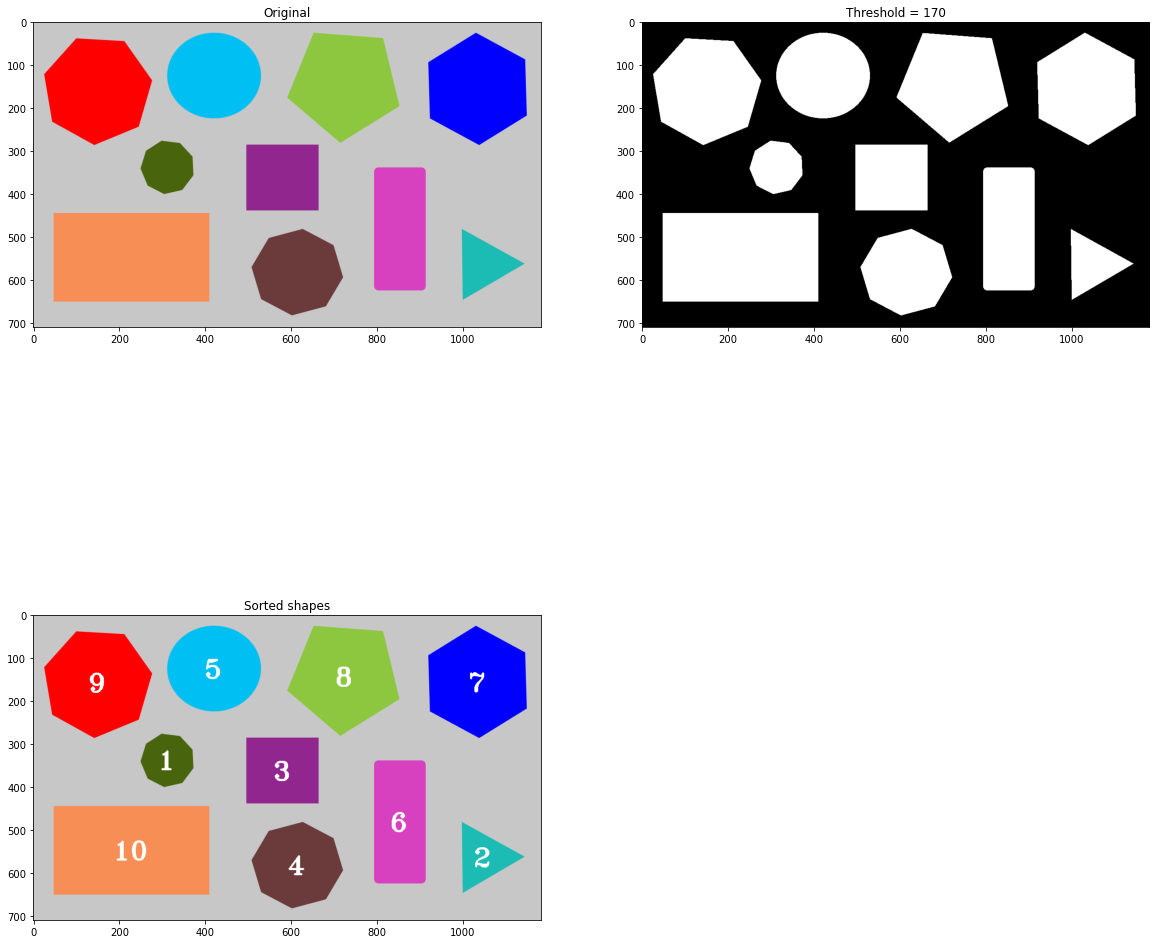

In [12]:
import cv2 as cv 
import numpy as np
import matplotlib.pyplot as plt

# Load the image and convert it to grayscale:
img = cv.imread("/Users/azureennaja/Desktop/Perantis/cv-master/essential/assets/shape8.png")

imgGray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply thresholding to get a binary image:
ret, threshImg = cv.threshold(imgGray, 170, 255, cv.THRESH_BINARY_INV)

# Convert the threshold image to RGB 
imgRGB1 = cv.cvtColor(threshImg, cv.COLOR_GRAY2RGB)

# Find contours using the thresholded image:
contours, hierarchy = cv.findContours(threshImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

# number of detected contours:
print(f"detected contours: {len(contours)}") 

# create list of tuple (size, shape) for each contour
# list of contour size
contours_sizes = [cv.contourArea(contour) for contour in contours]

# list of (size, contour)
size_shape_list = zip(contours_sizes, contours)
sorted_size_shape_list = sorted(size_shape_list) 

imgSorted = img.copy()

for i, (size, contour) in enumerate(sorted_size_shape_list):
    # Compute the moment of contour: -use to find center of shape
    M = cv.moments(contour)

    # The center or centroid can be calculated as follows:
    cX = int(M['m10'] / M['m00'])
    cY = int(M['m01'] / M['m00'])

    # Get the position to draw:    
    text = str(i + 1)
    fontFace = cv.FONT_HERSHEY_TRIPLEX
    fontScale = 2
    thickness = 3
    text_size = cv.getTextSize(text, fontFace, fontScale, thickness)[0]

    text_x = cX - text_size[0] / 2
    text_x = round(text_x)
    text_y = cY + text_size[1] / 2
    text_y = round(text_y)
    
    # Write the ordering of the shape on the center of shapes
    color = (255, 255, 255)
    cv.putText(imgSorted, text, (text_x, text_y), fontFace, fontScale, color, thickness)

plt.figure(figsize=(20,20))

imgRGB = img[:,:,::-1]
plt.subplot(221)
plt.title("Original")
plt.imshow(imgRGB)

plt.subplot(222)
plt.title("Threshold = 170")
plt.imshow(imgRGB1)

imgRGB = imgSorted[:,:,::-1]
plt.subplot(223)
plt.title("Sorted shapes")
plt.imshow(imgRGB)

plt.show()